# Training a Neural Network on Scikit's Make Circles
"Make circles" is a popular dataset to test whether machine learning models are able to properly fit non-linear data. Although XOR is the simplest dataset to verify this with, make circles allows for validation testing and for visualizing predictions.

## 1. The Dataset
Let's get a better look at what make_circles is. According to make_circle's documentation:

_Makes a large circle containing a smaller circle in 2d._

In [31]:
# Import dataset and other necessary modules
import numpy as np

from sklearn.datasets import make_circles
from ml_functions.plots import display_data

# Generate Dataset
X, y = make_circles(n_samples=200, noise=0.1, random_state=1)

`make_circles()` has a few important parameters that are worth taking note of:

  * n_samples - The _total_ number of points. I set it here to 200, that way both the inner and the outer circle each have 100 points.
  * noise - Defines the stanard deviation of gaussian noise for the data. 0.1 allows for some amount of noise, while maintaining the general circular shape.
  * random_state - This serves as a seed, and it used so that results are reproducible.

Let's plot the data. I have made a function `display_data()` that will automatically plot 2D data like this.

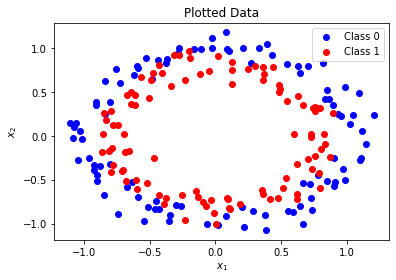

In [32]:
# Plot dataset
display_data(X,y)

As you can see, there is a clear outer and inner circle. Thus, it is expected for the model to be able to learn this relationship.

Now, let's create the training and test sets.

In [33]:
# Reshape the data. Will not work in the network model unless this is done.
X = np.reshape(X,(200,1,2))
y = np.reshape(y,(200,1,1)) 

# Creates a training/test split of 150/50
training_count = 150
X_train, X_test = X[:training_count, :], X[training_count:, :]
y_train, y_test = y[:training_count], y[training_count:]


Doing such a training/test split would normally be unacceptable (non-random, most likely non-optimal ratio). As this is a toy scenario, it is safe to ignore this issue and move on.

## 2. Neural Network
We can create a neural network model and train it on the dataset.

In [34]:
# Neural Network Imports
from neural_network.layers.activation_layer import ActivationLayer
from neural_network.layers.dense_layer import DenseLayer

from neural_network.network import NeuralNetwork

# Create network
network = NeuralNetwork(
    DenseLayer(2, 256),
    ActivationLayer('relu'),
    DenseLayer(256, 1),
    ActivationLayer('sigmoid')
)

The architecture is a 3 layer, fully-connected, deep neural network that has the following layer structure:
* input size of 2 ((x,y) coordinates)
* fully-connected layer with 256 neurons and has ReLU activation
* fully-connected output layer with 1 neuron and sigmoid activation

Following the sigmoid activation, if `output > 0.5`, then the network will choose class 1. Otherwise, it will choose class 0.

In [35]:
# Fits the model. Verbose is turned off as epochs is at 3000
history = network.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3000, lr=0.001, verbose=False)

## 3. Model Accuracy and Visualization
Now that the model is trained, we can see what its accuracies on the training and testing sets are.

In [36]:
# Gets training and testing accuracy
train_acc = network.evaluate(X_train, y_train)
test_acc = network.evaluate(X_test, y_test)

print('Training accuracy: {0:.5f}\nTesting accuracy: {1:.5f}'.format(train_acc, test_acc))

Training accuracy: 0.89333
Testing accuracy: 0.82000


As you can see, the model has overfitted on the data. This can be mitigated, but shows that the network is learning on the data, which is the main goal of this notebook.

Here is the training history visualized.

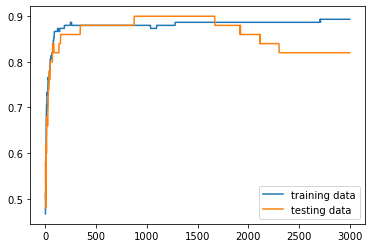

In [37]:
import matplotlib.pyplot as plt

# Plot the history
plt.plot(history['accuracy'], label='training data')
plt.plot(history['val_accuracy'], label='testing data')
plt.legend()
plt.show()

Finally, we can show that the network was able to make a generalization of the data with a heatmap.

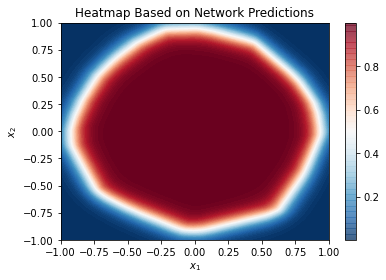

In [38]:
# Import heatmap visualization
from ml_functions.plots import display_prediction_heatmap

# Creates a heatmap in the 2D box [-1,-1] to [1,1]. An accuracy of 100 gives a good resolution
# without spending too much computation time
display_prediction_heatmap(network, -1, 1, -1, 1, acc=100)